In [1]:
import unicodedata
import re #used to clean text
import nltk #used to perform NLP
from nltk.corpus import stopwords #Importing stopwords
from nltk.stem.porter import PorterStemmer #Keeping the root of the words
from nltk import ngrams
import pdfplumber
import os
from collections import Counter
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import collections

In [2]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leobardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text)\
        .encode('ascii', 'ignore')\
        .decode("utf-8")
    return str(text)

In [4]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [5]:
minutas = []

In [8]:
for file in os.listdir('./Reportes'):
    print(file)
    current_pdf = []
    filename = os.fsdecode(file)
    if filename.endswith('.pdf'):
        with pdfplumber.open('./Reportes/'+file) as pdf:
            for pdf_page in pdf.pages:
                single_page_text = pdf_page.extract_text()
                current_pdf.append(single_page_text)
    current_pdf = [sheet for sheet in current_pdf if sheet is not None]
    current_pdf = [sheet.replace('\n','') for sheet in current_pdf]
    current_pdf = ' '.join(current_pdf)
    minutas.append(current_pdf)

100.pdf
101.pdf
102.pdf
103.pdf
104.pdf
105.pdf
106.pdf


In [9]:
corpus = []

In [10]:
corpus_joined = []

In [14]:
for m in minutas:
    # Remove accents
    m = strip_accents(m)
    # Remove numbers
    m = re.sub('[^a-zA-Z]', ' ', m)
    # Convert to lowercase
    m = m.lower()
    # Divide words
    m = m.split()
    # Instanciating porter steamer
    ps = PorterStemmer()
    # Remove spanish stopwords
    m = [ps.stem(word) for word in m if not word in set(stopwords.words('spanish'))]
    # Add to corpus
    corpus.append(m)
    # Join
    m = ' '.join(m)
    # Add to corpus joined
    corpus_joined.append(m)

In [15]:
corpus_full = flatten(corpus)
counts = Counter(corpus_full)

In [16]:
lista_final = pd.DataFrame(counts.most_common(65))
list_final = list(lista_final[0].values)

In [26]:
# Remove not wanted
if 'senalo' in list_final: list_final.remove('senalo')
if 'respecto' in list_final: list_final.remove('respecto')
if 'ano' in list_final: list_final.remove('ano')
if 'ma' in list_final: list_final.remove('ma')
if 'm' in list_final: list_final.remove('m')
if 'si' in list_final: list_final.remove('si')
if 'part' in list_final: list_final.remove('part')
if 's' in list_final: list_final.remove('s')
if 'i' in list_final: list_final.remove('i')
if 'j' in list_final: list_final.remove('j')
if 'asi' in list_final: list_final.remove('asi')

In [27]:
list_final = list_final[:50]

In [28]:
corpus_final_short = [i for i in list_final if i in list_final]

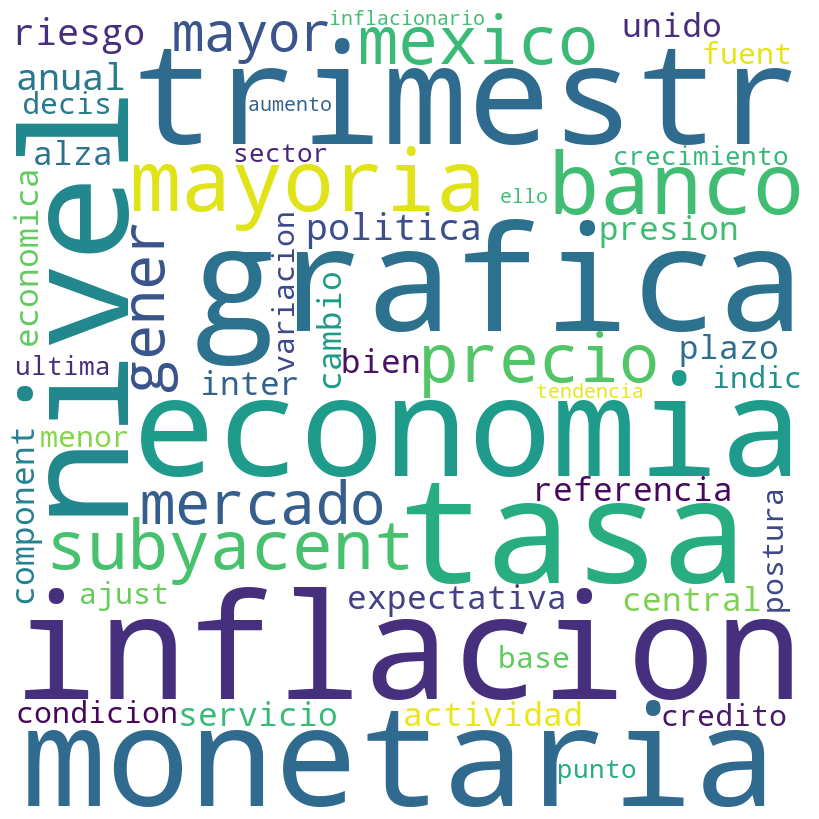

In [29]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                # stopwords = stopwords,
                min_font_size = 10).generate(' '.join(corpus_final_short))
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [30]:
lista_final_tabla = pd.DataFrame(list(lista_final[:].values))

In [31]:
lista_final_tabla

0    1
0    inflacion  847
1         tasa  680
2            j  412
3        nivel  391
4            m  358
..         ...  ...
60     consumo  116
61        baja  112
62       cifra  112
63  incremento  109
64    objetivo  107

[65 rows x 2 columns]

In [33]:
lista_final_tabla_=lista_final_tabla.drop([2,4])
lista_final_tabla_ = lista_final_tabla_.reset_index()
lista_final_tabla_["palabras"] = lista_final_tabla_[0]
lista_final_tabla_["frecuencia"] = lista_final_tabla_[1]
lista_final_tabla_.drop(['index', 0, 1], axis='columns', inplace=True)
#lista_final_tabla_=lista_final_tabla_[['palabras',"frecuencia"]]
lista_final_tabla_=lista_final_tabla_[:50]

Text(0.5, 0, 'palabras')

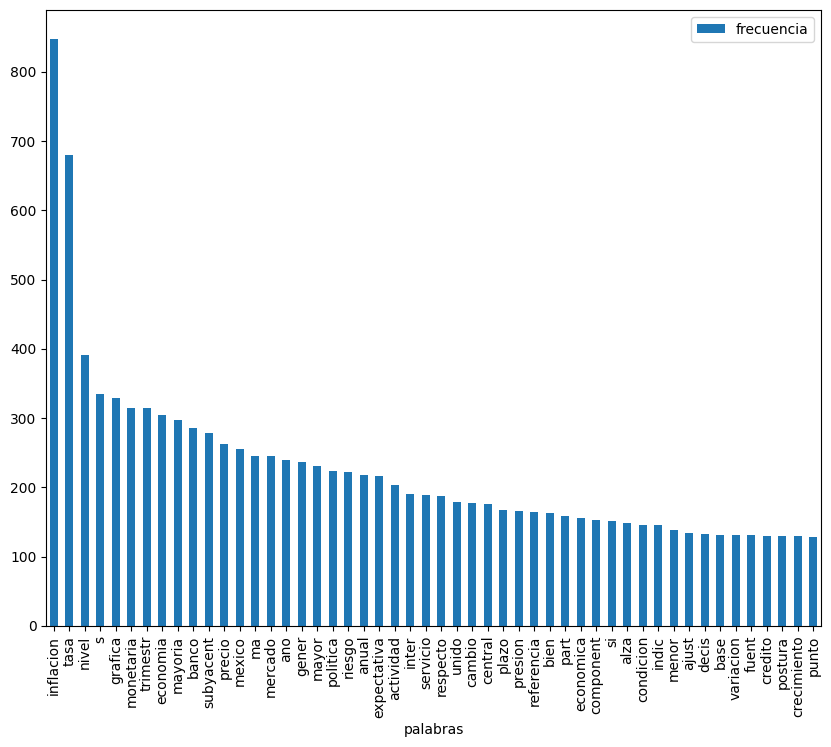

In [34]:
lista_final_tabla_.plot(x='palabras', y='frecuencia', kind='bar',figsize=(10,8))
plt.xticks(rotation=90)
plt.xlabel('palabras')
#plt.title('Frecuencias de las 50 palabras más utilizadas ')

In [35]:
chunck = 2
w_counter = collections.Counter()

In [36]:
for j in range(0, len(corpus_joined)):
    print(j)
    sent_gr = ngrams(corpus_joined[j].split(),chunck)
    sent_gr_c = collections.Counter(sent_gr)
    w_counter.update(sent_gr_c)

0
1
2
3
4
5
6


In [37]:
w_counter = pd.Series(w_counter)
w_counter = pd.DataFrame(w_counter)
w_counter.rename(columns={ w_counter.columns[0]: 'level' }, inplace = True)
w_counter = w_counter.sort_values(['level'], ascending=False)
w_counter = w_counter.reset_index()

In [38]:
pd.set_option('display.max_rows', 500)

In [39]:
w_counter.head(75)

level_0        level_1  level
0             j              j    252
1             m              s    243
2             s              m    220
3      politica      monetaria    155
4     inflacion          gener    152
5          tasa          inter    125
6            si           bien    117
7         banco         mexico    112
8         banco        central    110
9          tasa     referencia    101
10    actividad      economica     97
11    inflacion      subyacent     80
12        punto           base     67
13  expectativa      inflacion     67
14        junta       gobierno     67
15        ajust       estacion     64
16            i             ii     63
17    component      subyacent     62
18        largo          plazo     59
19    variacion          anual     58
20           ea              j     58
21      segundo       trimestr     58
22    condicion     financiera     57
23       ultima          decis     57
24        nivel        elevado     56
25     economia       avanzada     55
26      mercado          labor     55
27            j             ea     55
28        decis       politica     52
29         tipo         cambio     46
30      postura      monetaria     46
31     economia       emergent     46
32    principal       economia     45
33        nivel         actual     44
34       tercer       trimestr     44
35       primer       trimestr     43
36       cuarto       trimestr     42
37    inflacion          anual     42
38  elaboracion          banco     41
39     panorama  inflacionario     37
40      reserva          feder     37
41     estacion           seri     35
42            m              m     35
43      segunda       punteada     35
44         seri          ajust     35
45         seri      tendencia     35
46           ii          iiiiv     33
47       balanc         riesgo     33
48     horizont     pronostico     33
49            s              n     33
50         zona           euro     33
51    implicita          curva     32
52        iiiiv              i     32
53         tasa          fondo     31
54        fuent    elaboracion     31
55     objetivo           tasa     31
56       solida        segunda     31
57        linea         solida     30
58    inflacion           meta     30
59       riesgo           alza     30
60        fondo        federal     29
61        corto          plazo     29
62      mediano          largo     29
63        cifra          ajust     29
64      mayoria        destaco     29
65         tasa       trimestr     29
66        anual         ciento     28
67        fuent          inegi     28
68           ii            iii     28
69  restriccion      monetaria     28
70      mercado     financiero     28
71    tendencia        primera     28
72      mayoria         senalo     27
73      presion  inflacionaria     27
74       brecha       producto     27

In [42]:
##### Remove not wanted
w_counter_final=w_counter.drop([0,1,2,6,16])
w_counter_final = w_counter_final.reset_index()
w_counter_final["palabras"] = w_counter_final["level_0"] + ' ' + w_counter_final["level_1"] 
w_counter_final.drop(['index','level_0','level_1' ], axis='columns', inplace=True)
w_counter_final=w_counter_final[['palabras',"level"]]
w_counter_final=w_counter_final[:50]

Text(0.5, 0, 'palabras')

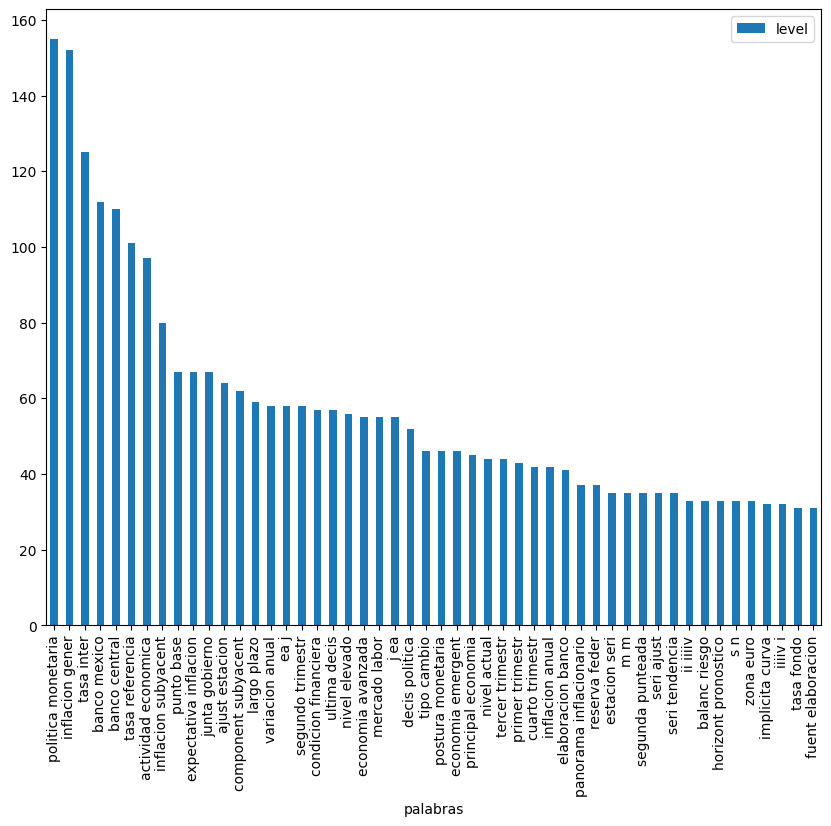

In [43]:
w_counter_final.plot(x='palabras', y='level', kind='bar',figsize=(10,8))
plt.xticks(rotation=90)
plt.xlabel('palabras')
#plt.title('Frecuencias de los 50 bigramas más utilizados ')

######################## HAWKISH AND DOVISH ANALYSIS ##############

In [44]:
######################## HAWKISH AND DOVISH ANALYSIS ##############

In [45]:
minutas = []

In [47]:
for file in os.listdir('./Reportes'):
    print(file)
    current_pdf = []
    filename = os.fsdecode(file)
    if filename.endswith('.pdf'):
        with pdfplumber.open('./Reportes/'+file) as pdf:
            for pdf_page in pdf.pages:
                single_page_text = pdf_page.extract_text()
                current_pdf.append(single_page_text)
    current_pdf = [sheet for sheet in current_pdf if sheet is not None]
    current_pdf = [sheet.replace('\n','') for sheet in current_pdf]
    current_pdf = ' '.join(current_pdf)
    minutas.append(current_pdf)

100.pdf
101.pdf
102.pdf
103.pdf
104.pdf
105.pdf
106.pdf


In [48]:
corpus = []

In [49]:
corpus_joined = []

In [51]:
for m in minutas:
    # Remove accents
    m = strip_accents(m)
    # Remove numbers
    m = re.sub('[^a-zA-Z]', ' ', m)
    # Convert to lowercase
    m = m.lower()
    # Divide words
    m = m.split()
    # Instanciating porter steamer
    ps = PorterStemmer()
    # Remove spanish stopwords
    m = [ps.stem(word) for word in m if not word in set(stopwords.words('spanish'))]
    # Add to corpus
    corpus.append(m)
    # Join
    m = ' '.join(m)
    # Add to corpus joined
    corpus_joined.append(m)

In [52]:
corpus_full = flatten(corpus)
counts = Counter(corpus_full)

In [53]:
listas_finales = pd.DataFrame(counts.most_common(10000))
list_finales = list(listas_finales[0].values)

In [54]:
lista_finales_tabla = pd.DataFrame(list(listas_finales[:].values))

In [55]:
lista_finales_tabla_=lista_finales_tabla.set_index([0])

In [56]:
#####HAWKISH WORDS ####